## 대입표현식 := (Assignment Expressions / Walus Operator)
python 3.8 이후부터 가능하다.

In [21]:
a = ['a', 'ab', 'abc']
for i in a:
    if (z = len(i)) > 1:
        print(z, i)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (807511486.py, line 3)

In [1]:
a = ['a', 'ab', 'abc']
for i in a:
    if (len(i)) > 1:
        z = len(i)
        print(z, i)

2 ab
3 abc


In [2]:
a = ['a', 'ab', 'abc']
for i in a:
    if (z := len(i)) > 1:
        print(z, i)

2 ab
3 abc


아래 형식처럼 쓰면 


출력1 if 조건 else 출력2<br>
if else (조건, 출력1, 출력2)


if 구문이 아니라 함수라는 점을 인식하자.

In [3]:
# 출력 if                   else 출력
[i/j if (j := i % 2) == 1 else j/(i + 1) for i in range(5)]

[0.0, 1.0, 0.0, 3.0, 0.0]

In [4]:
[i * n for i in ['', 'a', 'ab', 'abc'] if (n := len(i)) >= 1]

['a', 'abab', 'abcabcabc']

## 연습문제 1

In [5]:
import os, re
os.chdir(r'c:\Users\yunji\Desktop\코퍼스언어학\실습')

In [6]:
# 내 답
import collections

txts = [txt for txt in os.listdir('./06_data') if txt.endswith('.txt')]
words = list()
for txt in txts:
    words.extend(open('./06_data/' + txt).readlines())

s = re.findall('[^\w\s]', ''.join(words))
s_set = set(s)
s_list = sorted(list(s_set))
print("문장부호 목록: ", ' '.join(s_list))
print("문장부호 총빈도:", sum(collections.Counter(s).values()))

cnt = collections.Counter(s); cnt

문장부호 목록:  " ' , - .
문장부호 총빈도: 58


Counter({',': 27, '.': 22, "'": 4, '-': 3, '"': 2})

In [7]:
# 교수님 코드
import os, re
from collections import Counter

puncts = [re.sub('[\w\s]', '', j.lower())
            for i in os.listdir('./06_data') if i.endswith('.txt')
            for j in open('./06_data/' + i).read()]
cnt = Counter(''.join(puncts))
print('문장부호 목록:', ' '.join(sorted(cnt.keys())))
print('문장부호 총빈도:', sum(cnt.values()))
cnt

문장부호 목록: " ' , - .
문장부호 총빈도: 58


Counter({',': 27, '.': 22, "'": 4, '-': 3, '"': 2})

## 연습문제 2

In [8]:
# 내 코드
import pandas as pd
cnt_df = pd.DataFrame(pd.Series(cnt))
cnt_df.index.name = 'Puncts'
cnt_df.columns = ['Freq']
cnt_df.sort_index(ascending=True, inplace=True)
cnt_df.loc['Total'] = cnt_df['Freq'].sum()
cnt_df

,Freq
Puncts,
"""",2
',4
",",27
-,3
.,22
Total,58


In [ ]:
# 교수님 코드 1
srs = pd.Series(cnt)
srs = srs.sort_index()
srs2 = pd.concat([srs, pd.Series({'Total':srs.sum()})])
df = pd.DataFrame({'Freq':srs2})
df.index.name = 'Puncts'; df

,Freq
Puncts,
"""",2
',4
",",27
-,3
.,22
Total,58


In [14]:
# 교수님 코드 2
a = pd.DataFrame(dict(Freq = cnt));
a = a.sort_index()
b = pd.concat([a, pd.DataFrame({'Freq':a.Freq.sum()},
                                index=['Total'])], axis=0); b

,Freq
"""",2
',4
",",27
-,3
.,22
Total,58


### 과제
관찰로 패턴을 찾는 게 과제의 핵심이다.
뽑아야 할 어휘 근처에 공백이 있을 수 있으니 없애는/포함하는 로직을 추가해야 함.

2번 문제는 합쳐놓고 fill value 이런 거 쓰면 될 듯
10p: 확장자 txt -> 확장자 out 제거
2번 문제는 오늘 수업만으로 풀 수 있다.

## 인용부호 포함 DataFrame 입출력
quoting=3을 해야 한다.

In [ ]:
# df.to_csv('data/output/out1.txt', sep = '\t')
df.to_csv('data/output/out1.txt', sep = '\t', quoting=3)

In [26]:
pd.read_csv('data/output/out1.txt', sep = '\t', index_col=0, quoting=3)

,Freq
Puncts,
"""",2
',4
",",27
-,3
.,22
Total,58


## 연습문제 3

In [9]:
txts = [txt for txt in os.listdir('./06_data') if txt.endswith('.txt')]
words = list()
for txt in txts:
    words.extend(open('./06_data/' + txt).readlines())

In [ ]:
words = ' '.join(words); words

'For the past 25 years you have been a valued and respected employee of this company. \n Since you started in the mail room in 1979, your contributions to this firm have been invaluable. \n     Your skills led to your being promoted to executive secretary in 1992. \n     Thus, it is safe to say that without your contributions over the years, we would not be as successful \n     as we have been. \n On behalf of all the executives, we wish you well and hope you enjoy your well-earned retirement.\n Ever since the coming of television, there has been a rumor that the novel is dying, \n if not already dead.  Indeed, print-oriented novelists seem doomed to disappear, \n  as electronic media and computer games are becoming more influential. Nowadays, \n  many young people seem to prefer surfing the Internet to reading books. \n And often what they seek is not so much profound knowledge as quick information. \n One may wonder if literary fiction is destined to become an old-fashioned \n genre 

In [11]:
s = re.findall('[\w]+', ''.join(words).lower())
s_set = set(s)
s_list = sorted(list(s_set))
cnt = collections.Counter(s)

In [12]:
df = pd.DataFrame(cnt.values(), index=cnt)
df.index.name = 'Word'
df.sort_index(inplace=True)
df['Freq'] = df[0]
del df[0]
df

,Freq
Word,
14th,1
15,1
1656,1
1761,1
17th,1
...,...
years,2
york,1
you,4


버티컬 바 쓰고 왼쪽 오른쪽 나워서 하기!

교수님 답에서 조금 수정해야 한다.

'^\W+|\W+$' : w? W?

In [29]:
# 교수님 코드
import os, re
from collections import Counter
import pandas as pd

# words = [re.sub(r'^\W+|\W+$', '', j.lower())
words = [re.sub(r'\W', '', j.lower())
        for i in os.listdir('./06_data') if i.endswith('.txt')
        for j in open('./06_data/' + i).read().split()
        if re.search(r'\w', j)]
df = pd.DataFrame({'Freq':Counter(words)})
df = df.sort_index()
df.index.name = 'Word'
df

,Freq
Word,
14th,1
15,1
1656,1
1761,1
17th,1
...,...
years,2
york,1
you,4


## DataFrame 정렬
DataFrame에서는 by를 반드시 써줘야 한다.

In [30]:
df.sort_index(ascending=False).head()

,Freq
Word,
your,5
young,1
you,4
york,1
years,2


In [31]:
df.sort_index().head()

,Freq
Word,
14th,1
15,1
1656,1
1761,1
17th,1


In [32]:
df.sort_values(by=['Freq'], ascending=False).head()

,Freq
Word,
to,25
the,18
in,12
and,10
is,9


## DataFrame 차트 생성

<Axes: title={'center': 'Top 5'}, xlabel='Word', ylabel='Frequency'>

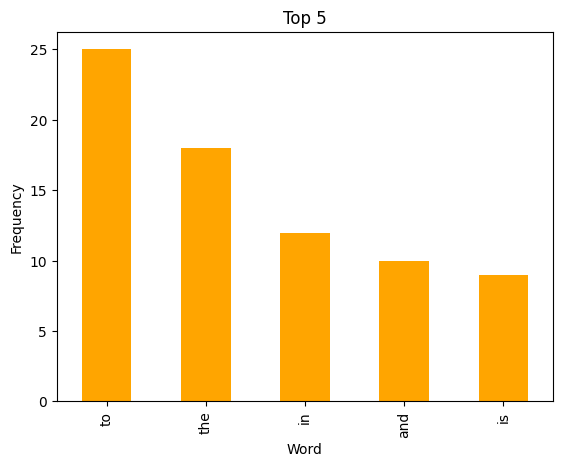

In [33]:
a = df.sort_values(by=['Freq'], ascending=False).head()
a.Freq.plot(kind='bar', ylabel='Frequency',
            title='Top 5', color='orange')

<Axes: title={'center': 'Top 5'}, ylabel='Frequency'>

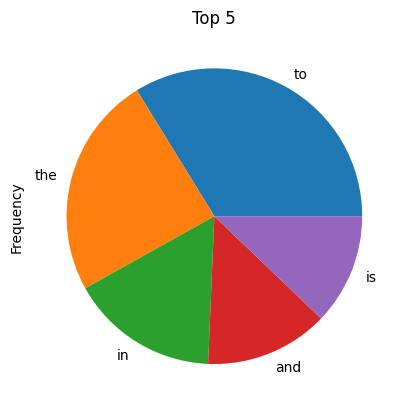

In [34]:
a.Freq.plot(kind='pie', ylabel='Frequency',
            title='Top 5')

## Term-Document Matrix

In [35]:
import os, re
from collections import Counter
import pandas as pd

TDM = {i:Counter(re.sub(r'\W', '', j.lower())
                for j in open('./06_data/' + i).read().split()
                if re.search(r'\w', j))
        for i in os.listdir('./06_data') if i.endswith('.txt')}
df = pd.DataFrame(TDM).sort_index().fillna(0).astype('int')
df.index.name = "Word"

In [38]:
df.head()

,01.txt,02.txt,03.txt,04.txt
Word,,,,
14th,0,0,0,1
15,0,0,0,1
1656,0,0,0,1
1761,0,0,0,1
17th,0,0,0,1


In [37]:
df.shape

(244, 4)